Jared Crebo 30085839

PHYS 381: Assignment 5

Curve fitting, optimizations, and finite difference methods

Kernel: Python 3.10.11 | IDE: Visual Studio Code

1 Nonlinear least squares

1.2 Implementation: least squares optimization

d) How good is your model already? Calculate $\chi^{2}_{N}$ and quantify how "good" your initial model is. 

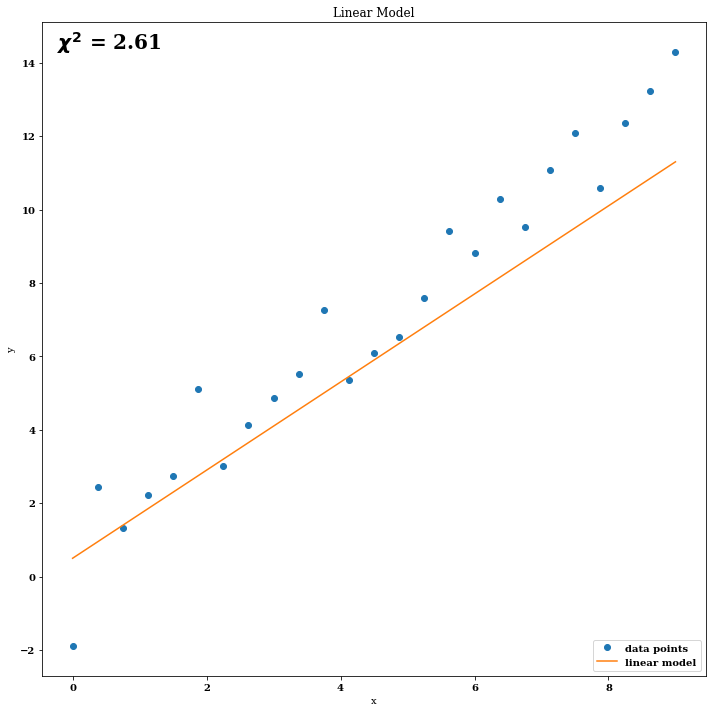

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Define font properties for the plot
font = {'family': 'serif', 'weight': 'bold', 'size': 16}
matplotlib.rc('font', **font)

def linear_model(x, param):
    '''for input slope and intercept return $y= m x + b$'''
    slope, intercept = param
    result = slope*x + intercept
    return result

def chi_squared_n(expected, observed, uncertainty = 1):
    '''calculate chi-squared per degree of freedom'''
    chi2 = np.sum((expected - observed)**2 / uncertainty**2)
    return chi2 / (len(observed) - 1)

# Load data from file
# The data file should contain two columns: x and y values
data = np.loadtxt('data_points_assign5.txt')
x = data[:,0]
y = data[:,1]

# Generate a linear model with initial slope and intercept
slope0, intercept0 = 1.2, 0.5
y_model = linear_model(x, (slope0, intercept0))

# Calculate the chi-squared value for the model
chi = chi_squared_n(y_model, y)

# Plot the data points and the linear model
fig, ax = plt.subplots(figsize = [10,10])
ax.plot(x, y, 'o', label='data points')
ax.plot(x, y_model, label='linear model')
ax.text(0.1, 0.97, f'$\chi^2$ = {chi:.2f}', fontsize=20, ha='center', va='center', transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Model')
ax.legend()
fig.tight_layout()

d) The current model does not fit the data very well. The $\chi^{2}_{N}$ is high (2.61) and the model has a slope that is lower than expected for these datapoints. 



f) What is the value of $\chi^{2}_{N}$ you obtained through optimization? How does the value of $\chi^{2}_{N}$ compare with the one you obtained in item d)? What about the slope and intercept parameters? Do they differ from the initial estimation given in item b)?

g) Do you see a minimum in both plots? If yes, mark the minima with a scatter symbol of your choice. 

Minimum chi-squared: 0.90
Best slope: 1.47
Best intercept: 0.36
Min Index (intercept, slope): (12, 49)


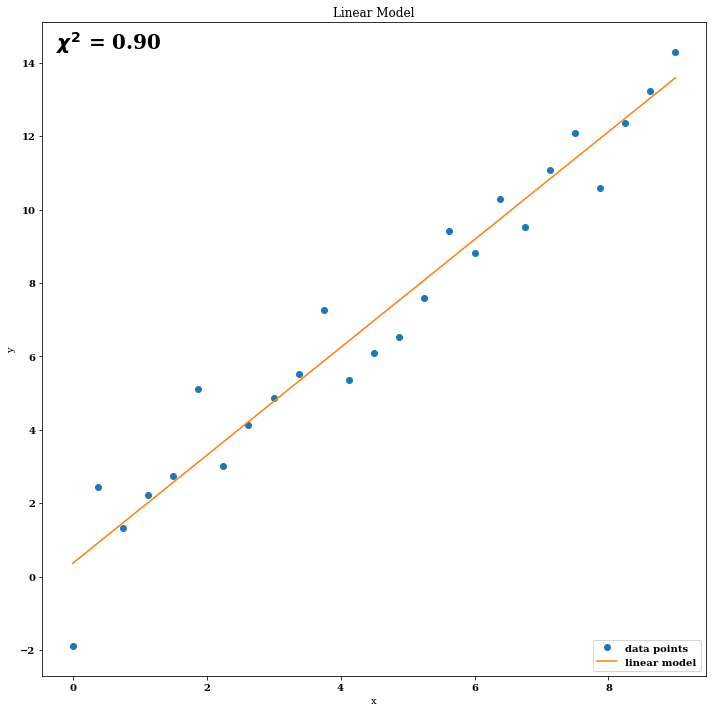

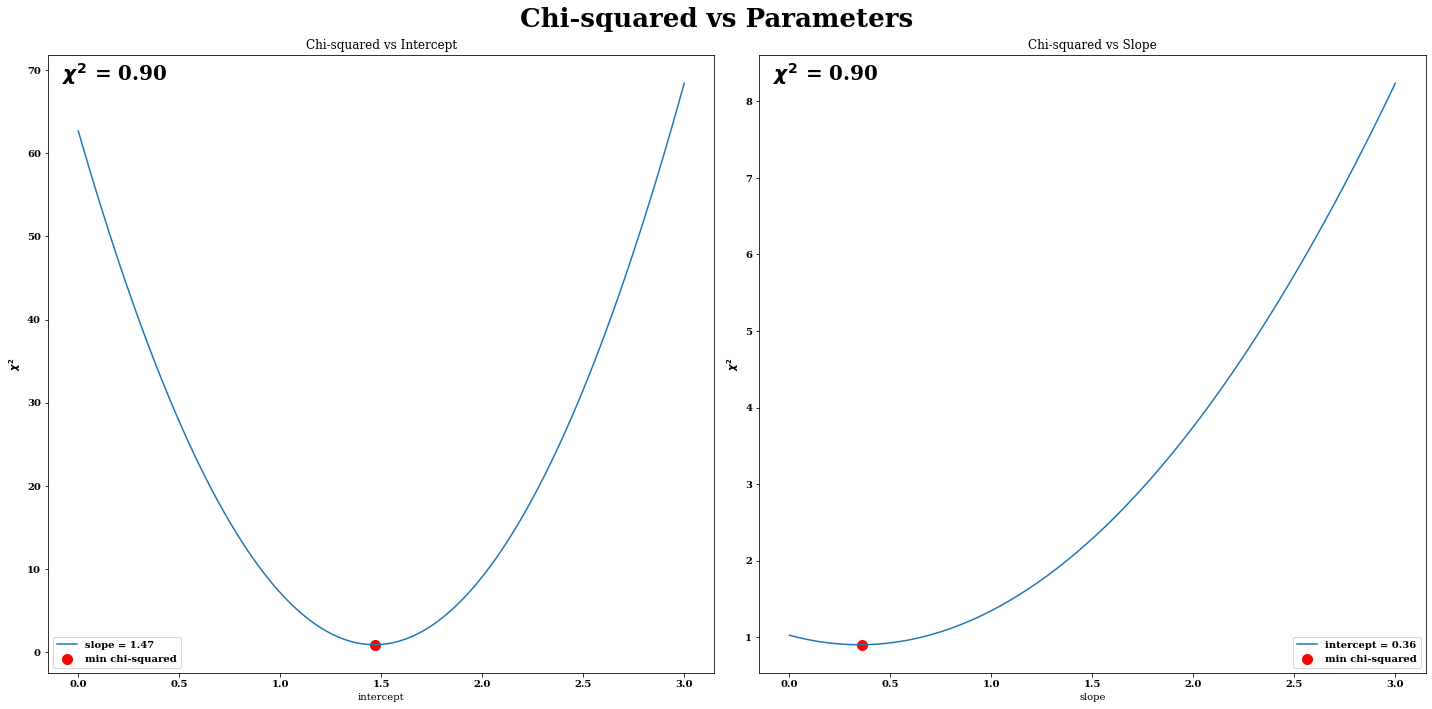

In [2]:
# Initialize parameters for the grid search
# Create a grid of slope and intercept values to search for the best fit
intercept_sequence = np.linspace(0.0, 3.0, 101)
slope_sequence = np.linspace(0.0, 3.0, 101)

# Create a 2D array to store the chi-squared values for each combination of slope and intercept
# Loop through each combination of slope and intercept, calculate the model, and compute chi-squared
rchi2 = np.zeros((len(intercept_sequence), len(slope_sequence)))
for i, intercept in enumerate(intercept_sequence):
    for j, slope in enumerate(slope_sequence):
        y_model = linear_model(x, (slope, intercept))
        rchi2[i,j] = chi_squared_n(y_model, y)

# Find the minimum chi-squared value and its corresponding slope and intercept
min_index = np.unravel_index(np.argmin(rchi2), rchi2.shape)
min_chi2 = rchi2[min_index]
min_slope = slope_sequence[min_index[1]]
min_intercept = intercept_sequence[min_index[0]]
print(f'Minimum chi-squared: {min_chi2:.2f}')
print(f'Best slope: {min_slope:.2f}')
print(f'Best intercept: {min_intercept:.2f}')
print(f'Min Index (intercept, slope): {min_index}')

# Plot the linear model with the best fit parameters
fig, ax = plt.subplots(figsize = [10,10])
ax.plot(x, y, 'o', label='data points')
ax.plot(x, min_slope*x + min_intercept, label='linear model')
ax.text(0.1, 0.97, f'$\chi^2$ = {min_chi2:.2f}', fontsize=20, ha='center', va='center', transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Model')
ax.legend()
fig.tight_layout()

# Plot the chi-squared values as a function of slope and intercept
fig, ax = plt.subplots(1,2,figsize = [20,10])
ax[0].plot(intercept_sequence, rchi2[min_index[0],:], label='slope = %.2f' % min_slope)
ax[0].set_ylabel(r'$\chi^2$')
ax[0].set_title('Chi-squared vs Intercept')
ax[0].set_xlabel('intercept')
ax[1].plot(slope_sequence, rchi2[:,min_index[1]], label='intercept = %.2f' % min_intercept)
ax[1].set_ylabel(r'$\chi^2$')
ax[1].set_title('Chi-squared vs Slope')
ax[1].set_xlabel('slope')
ax[0].text(0.1, 0.97, f'$\chi^2$ = {min_chi2:.2f}', fontsize=20, ha='center', va='center', transform=ax[0].transAxes)
ax[1].text(0.1, 0.97, f'$\chi^2$ = {min_chi2:.2f}', fontsize=20, ha='center', va='center', transform=ax[1].transAxes)
fig.suptitle('Chi-squared vs Parameters',fontsize = 26, weight = 'bold')
ax[1].scatter(intercept_sequence[min_index[0],], min_chi2, color='red', s=100, label='min chi-squared')
ax[0].scatter(min_slope, min_chi2, color='red', s=100, label='min chi-squared')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

f) $\chi^{2}_{N} = 0.90$ was obtained through optimization over a range of possible intercepts and slopes for the linear model. This value of $\chi^{2}_{N}$ is significantly minimized from 2.61 to 0.90, indicating a better fit to the datapoints. This is evident through the new plot with the line of best fit overlayed on the datapoints that show a more accurate reflection of the relationship. The new best fit parameters are $y = 1.47x + 0.36$ which fits the model well, as opposed to $y = 1.2x + 0.5$ which was previously plotted. 

g) The plots do have minimas within the range [0.0, 3.0] and they are indicated with red dots in the figures. 

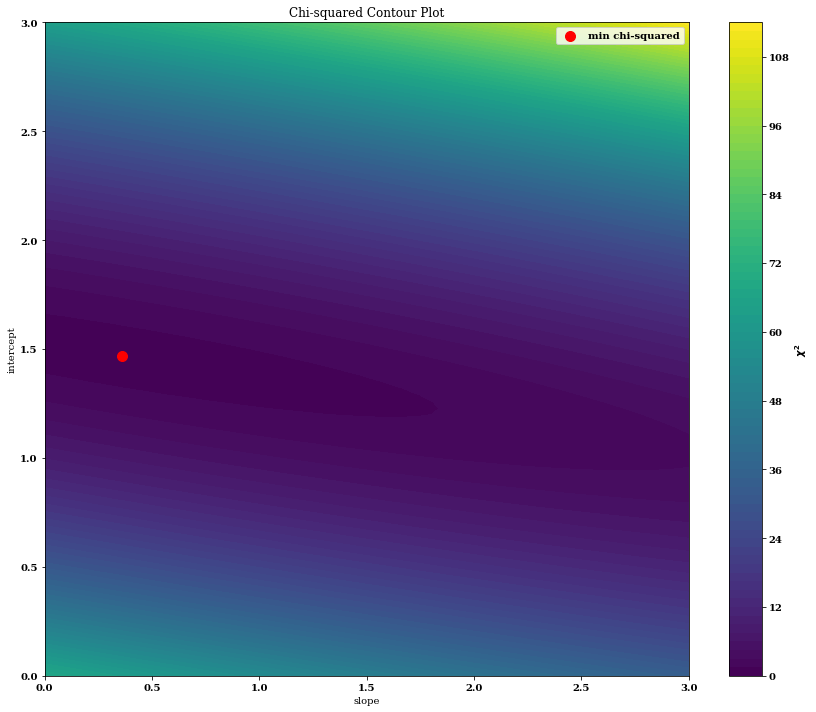

In [3]:
# Plot the chi-squared contour plot
# Create a meshgrid for the slope and intercept values
xx, yy = np.meshgrid(slope_sequence, intercept_sequence)
fig, ax = plt.subplots(figsize = [12,10])
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_title('Chi-squared Contour Plot')
fig.colorbar(ax.contourf(xx, yy, rchi2.T, levels=100, cmap='viridis'), ax=ax, label=r'$\chi^2$')
ax.scatter(min_intercept, min_slope, color='red', s=100, label='min chi-squared')
ax.legend()
fig.tight_layout()

The Chi-squared Contour Plot shows a 2D colour map of the $\chi^{2}_{N}$ values. 